# Ocular Melanomas

To solve the question: "What's the relationship between the GNA11 and Ocular Melanomas when considering the influence of age?"

# 1. Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.UVM.sampleMap_UVM_clinicalMatrix', sep='\t', index_col=0)

gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)


In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_UVM_mutation_bcm_gene,_GENOMIC_ID_TCGA_UVM_hMethyl450,_GENOMIC_ID_TCGA_UVM_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_UVM_mutation_broad_gene,_GENOMIC_ID_TCGA_UVM_RPPA,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_UVM_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_UVM_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/UVM/miRNA_HiSeq_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39X-05,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39W-08,NaN,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39X-05,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39W-08,9A2C60AE-C0F6-4AFF-B7A2-517D8CD8FFBF,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39X-05,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39W-08,NaN,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39X-05,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39W-08,NaN,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01,TCGA-V4-A9E5-01
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39X-05,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39W-08,NaN,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01,TCGA-V4-A9E7-01


In [5]:
gene_data.head()

,TCGA-VD-A8KM-01,TCGA-V4-A9F4-01,TCGA-WC-A881-01,TCGA-V4-A9F1-01,TCGA-VD-AA8N-01,TCGA-V4-A9EY-01,TCGA-V4-A9EI-01,TCGA-VD-AA8O-01,TCGA-WC-A880-01,TCGA-WC-A882-01,...,TCGA-YZ-A983-01,TCGA-V3-A9ZY-01,TCGA-V4-A9EE-01,TCGA-VD-A8KA-01,TCGA-V4-A9F2-01,TCGA-V4-A9EF-01,TCGA-V4-A9E7-01,TCGA-VD-A8K7-01,TCGA-VD-AA8R-01,TCGA-VD-AA8S-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.328308,0.181808,-0.675092,-0.099592,-0.923192,0.856308,-0.500792,-1.383992,-0.610992,0.314408,...,-0.342392,0.759608,-0.345992,-0.542592,0.091708,-0.422092,-1.492392,-0.147592,0.101408,-0.384292
HIF3A,-2.024226,4.083274,0.930474,-2.625726,0.266874,-1.676226,1.174074,-3.701426,-3.911226,-0.047726,...,-3.762626,-2.163926,-1.036026,0.591874,1.572974,-1.473726,-0.380626,1.209374,-3.264126,-0.846326
RNF17,-0.531035,0.121665,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,1.034565,0.083565,-0.531035,...,-0.531035,-0.531035,-0.531035,0.724565,-0.531035,0.488565,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.617928,0.004928,0.052728,0.167428,0.567828,0.717928,-0.043372,-0.467072,0.344028,0.322328,...,0.309428,0.621628,-0.025972,0.234828,0.340328,0.226928,0.108028,-0.047772,0.080928,0.250728
RNF11,-0.135878,0.220722,-1.941478,0.077722,-1.054078,-1.287178,-0.350778,-0.983478,-0.087778,-2.554178,...,0.281922,-0.827378,-0.493578,-1.849978,-0.754078,-0.660978,-1.989578,0.357522,0.989322,-1.179378


In [8]:
gene_fullname = 'GNA11'
gene = 'kras'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Ocular Melanomas'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 96 features, and the gene dataset includes 20530 genes


In [9]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,0.266522,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,0.925522,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,0.924622,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,2.938822,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,-0.075278,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712


In [10]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,0.266522,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,0.925522,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,0.924622,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,2.938822,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,-0.075278,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712


In [11]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ocular Melanomas
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812,1
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588,1
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912,1
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112,1
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712,1


In [12]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

# 2. Preliminary analysis

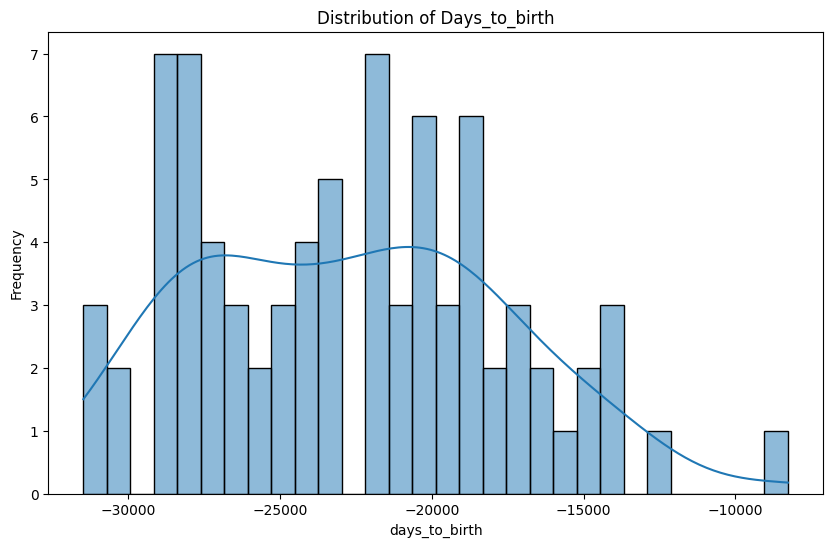

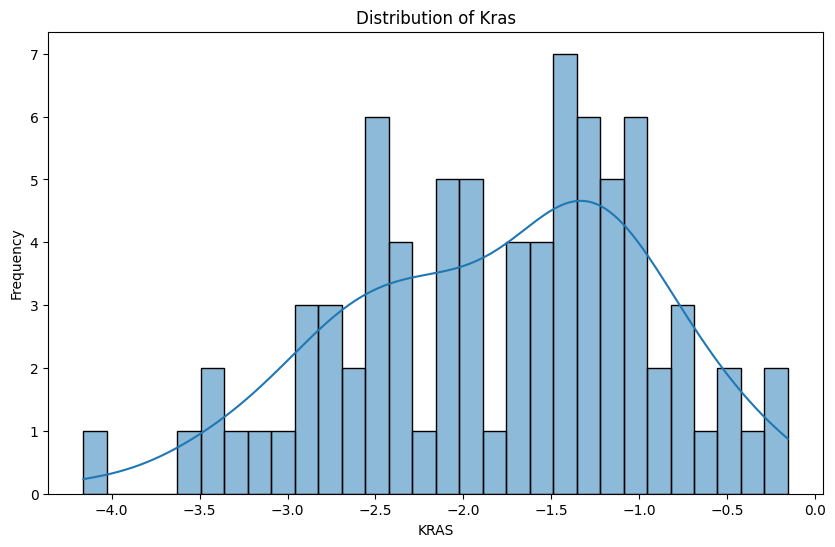

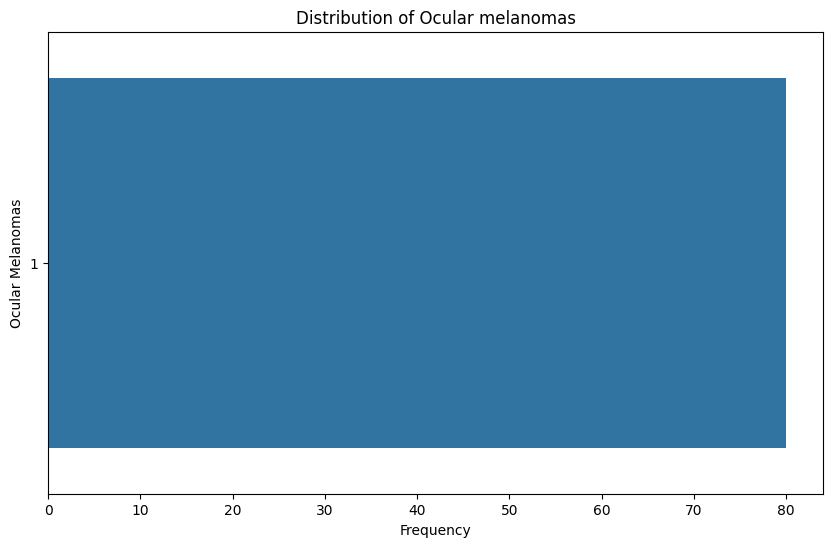

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])


In [14]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ocular Melanomas
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812,1
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588,1
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912,1
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112,1
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712,1


# 3. Do regression & Cross Validation

In [15]:
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [16]:
def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

NameError: name 'y' is not defined

# 4. Discussion

In [17]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between GNA11 and Ocular Melanomas when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the GNA11 and Ocular Melanomas when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the GNA11 and Ocular Melanomas when considering the influence of age.




In [18]:
threshold = 0.05

def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    # Function to interpret the coefficient and p-value of a variable
    # ... (as described in your code)

# Assuming gene_results and condition_results are lists of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
condition_results = [("condition1", 0.15, 0.08), ("condition2", -0.18, 0.2)]

interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

IndentationError: expected an indented block (1919925837.py, line 8)

In [21]:
def confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, significance_level=0.05):
    """Determine if GNA11 or GNA12 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"GNA11 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"GNA12 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Assuming gene_results is a list of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
trait = "your_trait"  # Replace with the actual trait name
condition = "your_condition"  # Replace with the actual condition name
threshold = 0.05

conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: gene1
Conclusion: GNA11 is confirmed: There is an association between the expression of the gene1 and your_trait when considering the influence of your_condition.

Variable: gene2
Conclusion: GNA12 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the gene2 gene and your_trait when considering the influence of your_condition.


